In [13]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        #print(os.path.join(dirname, filename))
        continue



In [14]:
import os
import cv2
import numpy as np

#Encoding and Split data into Train/Test Sets
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

#Tensorflow Keras CNN Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop

#Plot Images
import matplotlib.pyplot as plt

folder_dir = '../input/flowers-recognition/flowers'

In [15]:
data = []
label = []

SIZE = 128 #Crop the image to 128x128

for folder in os.listdir(folder_dir):
    for file in os.listdir(os.path.join(folder_dir, folder)):
        if file.endswith("jpg"):
            label.append(folder)
            img = cv2.imread(os.path.join(folder_dir, folder, file))
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            im = cv2.resize(img_rgb, (SIZE,SIZE))
            data.append(im)
        else:
            continue

In [16]:
data_arr = np.array(data)
label_arr = np.array(label)
encoder = LabelEncoder()
y = encoder.fit_transform(label_arr)
y = to_categorical(y,5)
X = data_arr/255

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

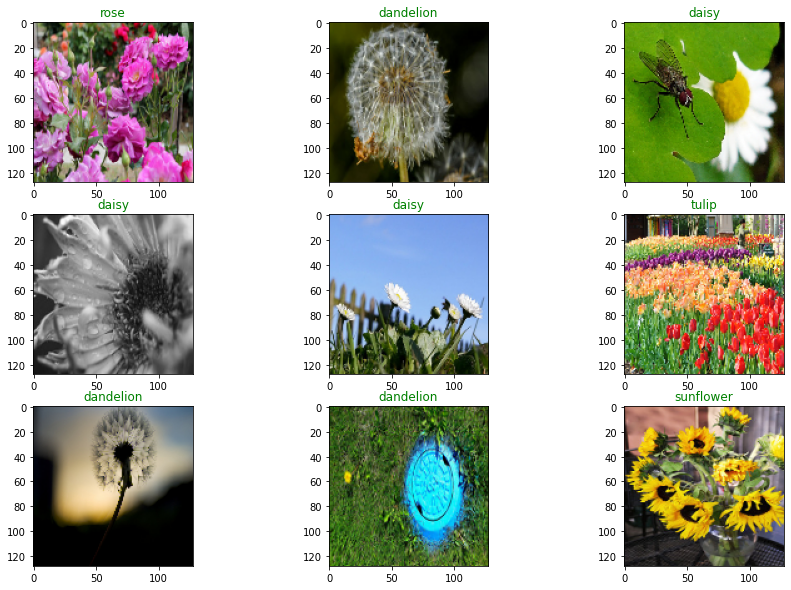

In [18]:
categories = np.sort(os.listdir(folder_dir))
fig, ax = plt.subplots(3,3, figsize=(15, 10))

for i in range(3):
    for j in range(3):
        k = int(np.random.random_sample() * len(X_test))
        ax[i,j].set_title(categories[np.argmax(y_test[k])], color='green')
        ax[i,j].imshow(np.array(X_test)[k].reshape(SIZE, SIZE, 3), cmap='gray')
        

In [19]:
model = Sequential()
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu', input_shape = (SIZE,SIZE,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(5, activation = "softmax"))

In [20]:

datagen = ImageDataGenerator(
        rotation_range=20,
        zoom_range = 0.20,
        width_shift_range=0.3,
        height_shift_range=0.3,
        horizontal_flip=True,
        vertical_flip=True)

datagen.fit(X_train)

In [21]:
model.compile(optimizer=Adam(lr=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
batch_size=32
epochs=200
history = model.fit_generator(datagen.flow(X_train,y_train, batch_size=batch_size),
                              epochs = epochs,
                              validation_data = (X_test,y_test),
                              verbose = 1)
model.save('model.h5')

Epoch 1/200
108/108 [==============================] - 13s 120ms/step - loss: 1.4889 - accuracy: 0.3200 - val_loss: 1.2432 - val_accuracy: 0.4421
Epoch 2/200
108/108 [==============================] - 12s 115ms/step - loss: 1.3563 - accuracy: 0.4130 - val_loss: 1.1846 - val_accuracy: 0.5012
Epoch 3/200
108/108 [==============================] - 13s 117ms/step - loss: 1.2652 - accuracy: 0.4593 - val_loss: 1.1797 - val_accuracy: 0.5012
Epoch 4/200
108/108 [==============================] - 13s 117ms/step - loss: 1.2148 - accuracy: 0.4967 - val_loss: 1.1212 - val_accuracy: 0.5451
Epoch 5/200
108/108 [==============================] - 13s 117ms/step - loss: 1.1734 - accuracy: 0.5207 - val_loss: 1.0241 - val_accuracy: 0.5984
Epoch 6/200
108/108 [==============================] - 13s 117ms/step - loss: 1.1364 - accuracy: 0.5468 - val_loss: 0.9944 - val_accuracy: 0.6065
Epoch 7/200
108/108 [==============================] - 13s 118ms/step - loss: 1.0928 - accuracy: 0.5723 - val_loss: 0.9500 -

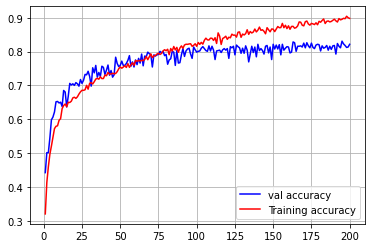

In [22]:
x= range(1, len(history.history['val_accuracy'])+1)
y=history.history['val_accuracy']
z= history.history['accuracy']
plt.plot(x,y, 'b', label="val accuracy")
plt.plot(x,z, c='red', label="Training accuracy")
plt.grid()
plt.legend(loc='lower right')

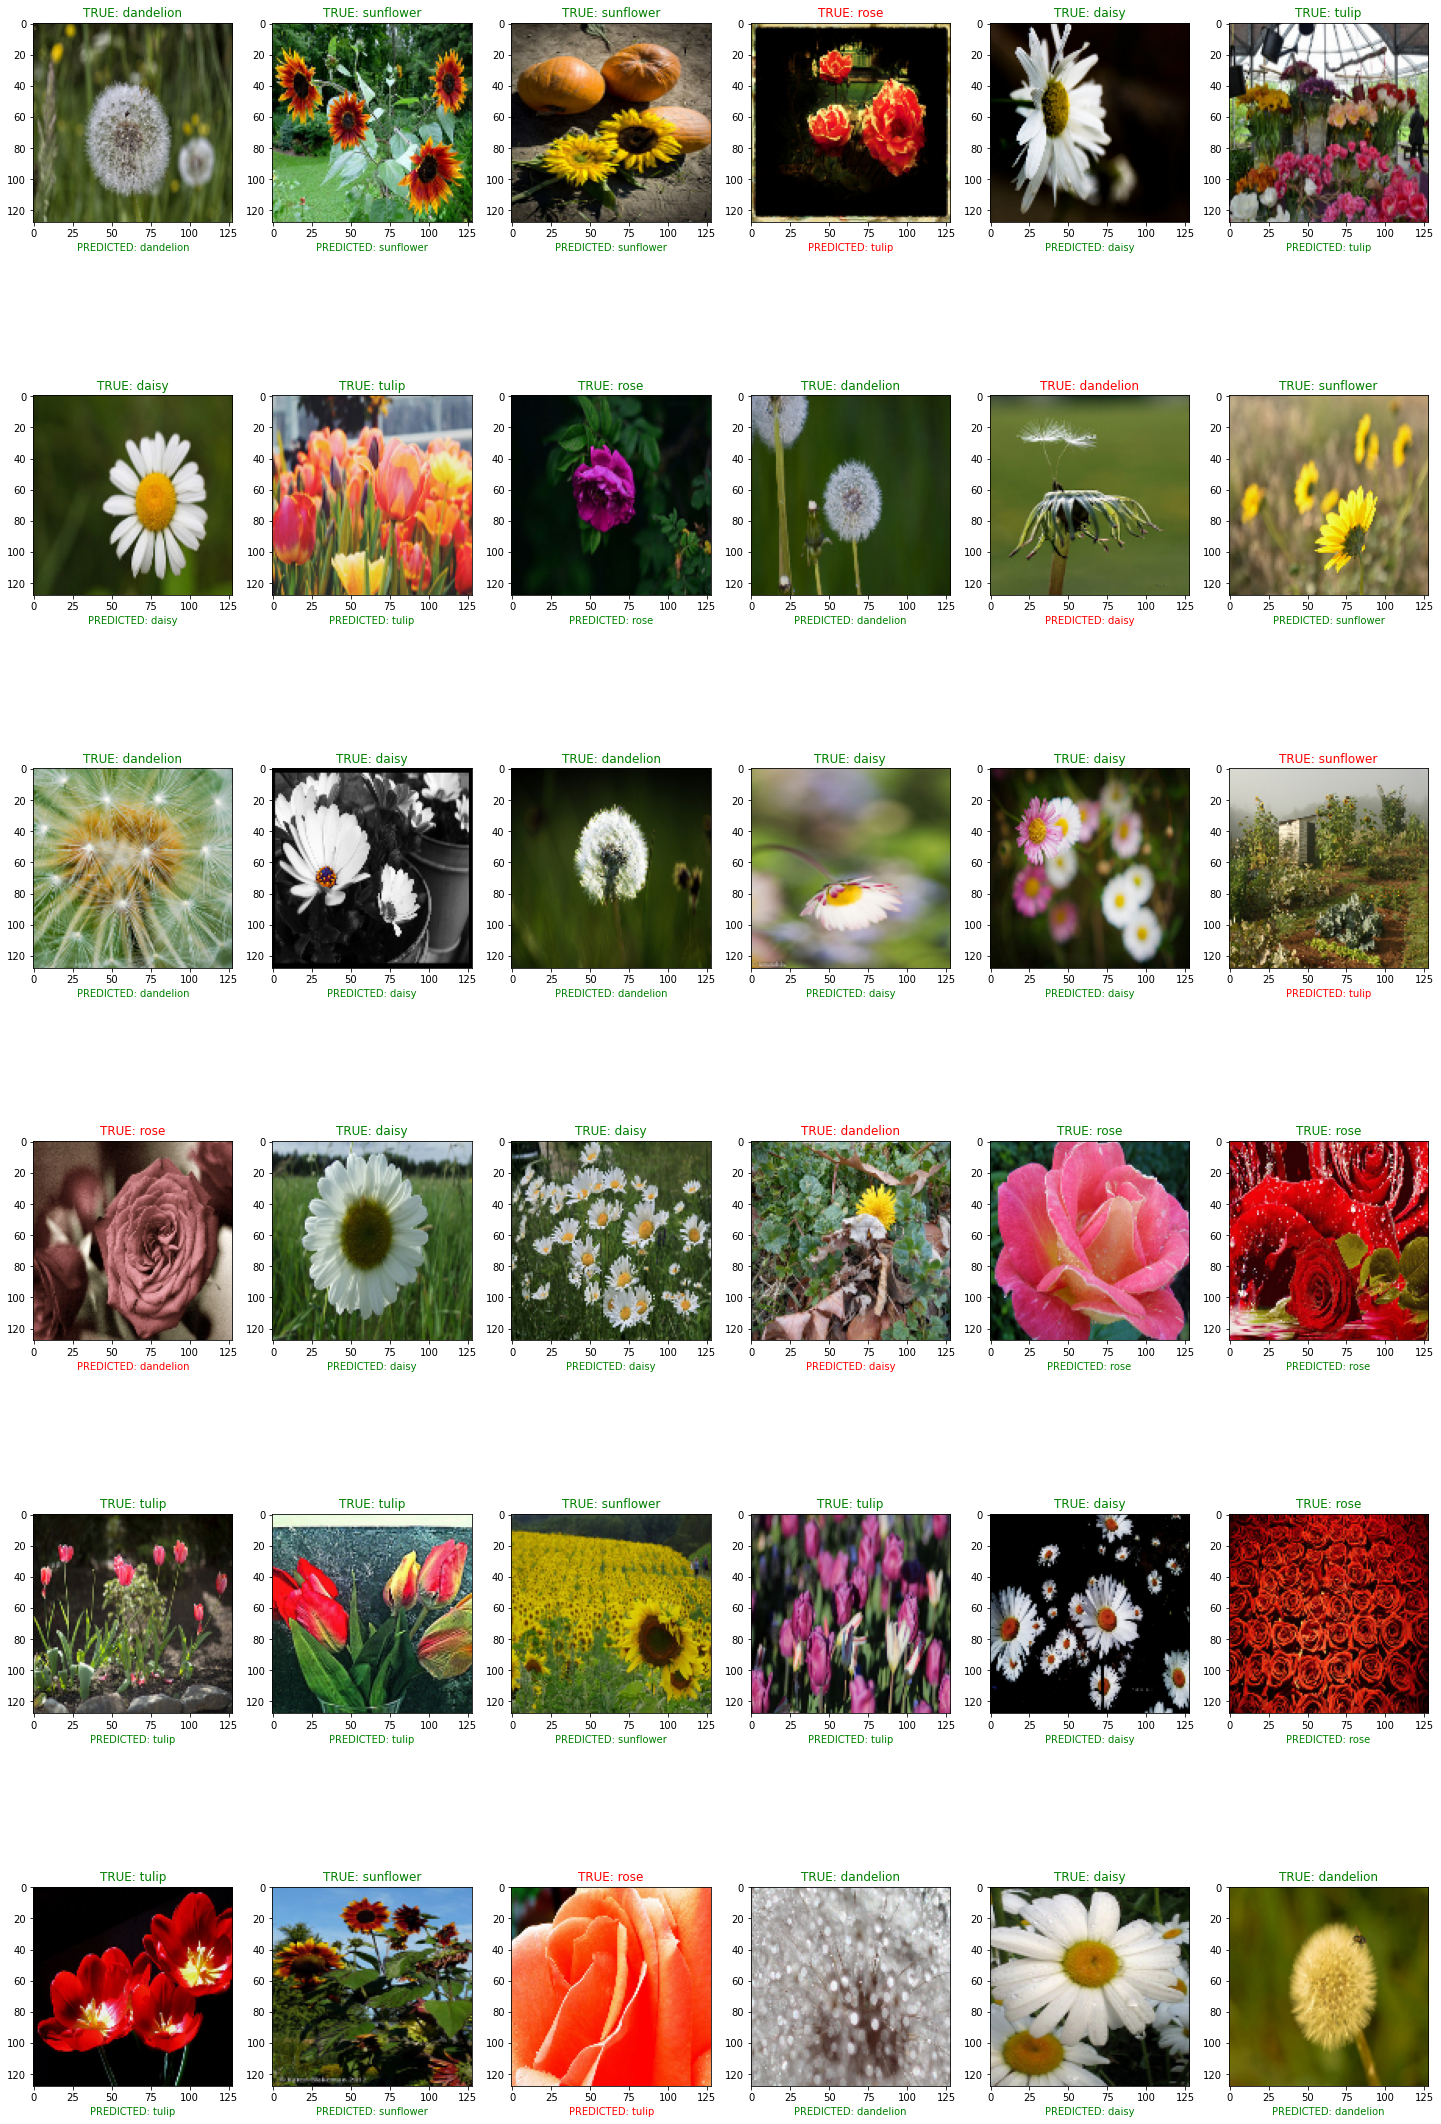

In [23]:

categories = np.sort(os.listdir(folder_dir))
fig, ax = plt.subplots(6,6, figsize=(25, 40))

for i in range(6):
    for j in range(6):
        k = int(np.random.random_sample() * len(X_test))
        if(categories[np.argmax(y_test[k])] == categories[np.argmax(model.predict(X_test)[k])]):
            ax[i,j].set_title("TRUE: " + categories[np.argmax(y_test[k])], color='green')
            ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(model.predict(X_test)[k])], color='green')
            ax[i,j].imshow(np.array(X_test)[k].reshape(SIZE, SIZE, 3), cmap='gray')
        else:
            ax[i,j].set_title("TRUE: " + categories[np.argmax(y_test[k])], color='red')
            ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(model.predict(X_test)[k])], color='red')
            ax[i,j].imshow(np.array(X_test)[k].reshape(SIZE, SIZE, 3), cmap='gray')

Predicted Output: 
Rose


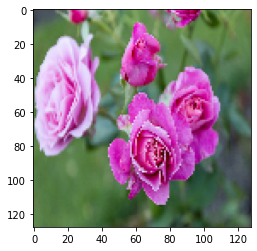

In [24]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np

# dimensions of our images
img_width, img_height = 128, 128

# load the model we saved
model = load_model('model.h5')
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# predicting images
img = image.load_img('../input/flowers-recognition/flowers/rose/11944957684_2cc806276e.jpg', target_size=(img_width, img_height))
plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x/=255

images = np.vstack([x])
predict_x=model.predict(images) 
classes_x=np.argmax(predict_x,axis=1)

print("Predicted Output: ")
if classes_x == 0:
    print("Daisy")
elif classes_x == 1:
    print("Dandelion")
elif classes_x == 2:
    print("Rose")
elif classes_x == 3:
    print("Sunflower")
elif classes_x == 4:
    print("Tulip")
